In [ ]:
from google.colab import files
files.upload()

In [ ]:
from google.colab import files
files.upload()

In [ ]:
pip install optuna


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import re

from scipy import stats as st
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import optuna
import json
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")

In [ ]:
#read the dataset using pandas
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


<ipython-input-5-49504a6a70e5>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
# features having missing values
100*df.isnull().sum()

ID                                0
Customer_ID                       0
Month                             0
Name                         998500
Age                               0
SSN                               0
Occupation                        0
Annual_Income                     0
Monthly_Inhand_Salary       1500200
Num_Bank_Accounts                 0
Num_Credit_Card                   0
Interest_Rate                     0
Num_of_Loan                       0
Type_of_Loan                1140800
Delay_from_due_date               0
Num_of_Delayed_Payment       700200
Changed_Credit_Limit              0
Num_Credit_Inquiries         196500
Credit_Mix                        0
Outstanding_Debt                  0
Credit_Utilization_Ratio          0
Credit_History_Age           903000
Payment_of_Min_Amount             0
Total_EMI_per_month               0
Amount_invested_monthly      447900
Payment_Behaviour                 0
Monthly_Balance              120000
Credit_Score                

**DATA CLEANING**

On closely observing data, the conslusion is data contains 8 consecutive months data for 12500 customers, while much information remains same for 8 months data like **Name,Annual_Income, Num_Bank_Accounts, Interest_Rate,Num_of_Loan, Outstanding_Debt**,some variables changes evry monthly **Amount_invested_monthly, Monthly_Balance** while there are some variableS
that dependent on previous values and increments like **Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age.**

There are also outliers and wrong information present like Payment_Behaviour=="!@9#%8", negative values for **Num_Bank_Accounts, Num_of_Loan **and extremely high value for **Amount_invested_monthly **etc.

For variables where infromation remain same throughout 8 months, we will caluate mode and replace null and wrong values with mode.

For variables that vary monthly, we will replace outliers and null values using the mode caluated for each customer_id.

For variables that increments, we will use past and future values to impute missing values using forward and backward fill.

There are many variables that should be numerical type but present as object type like** Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly**. These variables contain mixed types some instances as int/float while others as string.

**ID, Customer_ID, Month, Name, SSN, Occupation, Type_of_Loan** will be dropped as they are not useful for classification task.


**Categorical Variable**

In [ ]:
data=df.copy()

In [ ]:
#Categorical Variables
col=["Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour", "Type_of_Loan"]

In [ ]:
data["Credit_Mix"].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st

# Assuming 'data' is your DataFrame and 'Customer_ID' is a column in it
index = data[data["Credit_Mix"] == "_"].index
data.loc[index, "Credit_Mix"] = np.nan

# Drop rows with NaN values in 'Credit_Mix'
df1 = data.dropna(subset=["Credit_Mix"])

# Convert 'Credit_Mix' to categorical codes
df1["Credit_Mix"] = df1["Credit_Mix"].astype('category').cat.codes

# Compute mode of 'Credit_Mix' for each 'Customer_ID'
ser = df1.groupby("Customer_ID")["Credit_Mix"].agg(lambda x: st.mode(x)[0])
# Drop 'Credit_Mix' column
data.drop("Credit_Mix", axis=1, inplace=True)

# Merge mode values back to the DataFrame
data = pd.merge(left=data, right=ser, how="left", left_on="Customer_ID", right_index=True)


In [ ]:
data["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st

# Assuming 'data' is your DataFrame and 'Customer_ID' is a column in it
index = data[data["Payment_Behaviour"] == "!@9#%8"].index
data.loc[index, "Payment_Behaviour"] = np.nan

# Drop rows with NaN values in 'Payment_Behaviour'
df1 = data.dropna(subset=["Payment_Behaviour"])

# Compute mode of 'Payment_Behaviour' for each 'Customer_ID'

ser = df1.groupby("Customer_ID")["Payment_Behaviour"].apply(lambda x: x.mode().iloc[0] if not x.empty else np.nan)
# Drop 'Payment_Behaviour' column
data.drop("Payment_Behaviour", axis=1, inplace=True)

# Merge mode values back to the DataFrame
data = pd.merge(left=data, right=ser, how="left", left_on="Customer_ID", right_index=True)


In [ ]:
data["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

**Numerical Variable**

In [ ]:
'''Features that should be of numerical type but are present as categorical
   variable(object type), we will convert them to numerical type.These variable
   contain mix type, for example Monthly_Balance variable contain float type for
   index 0:98303 and string type from index 98304:99999'''

cols=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
      'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

for col in cols:
    data[col]=data[col].apply(lambda x: x if x is np.nan or not isinstance(x, str)
                        else x.replace("_","")).replace("",np.nan)
    data[col]=data[col].astype(np.float64)

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st

# Assuming 'data' is your DataFrame and 'Customer_ID' is a column in it
cols=["Age", "Annual_Income", "Num_Bank_Accounts","Num_Credit_Card", "Interest_Rate",
      "Num_of_Loan", "Monthly_Inhand_Salary","Changed_Credit_Limit","Outstanding_Debt",
      "Total_EMI_per_month"]

for col in cols:
    # Replace negative values with NaN
    data[col] = data[col].where(data[col] >= 0, np.nan)

# Drop rows with NaN values in the specified columns
df1 = data.dropna(subset=cols)

# Compute mode of specified columns for each 'Customer_ID'
ser = df1.groupby("Customer_ID")[cols].agg(lambda x: st.mode(x)[0])

# Merge mode values back to the DataFrame
data = data.drop(cols, axis=1).merge(ser, how="left", left_on="Customer_ID", right_index=True)


In [ ]:
'''These features can best imputed by same feature values present in customer record for
   different month,therefore we will use that customer record for imputating missing
   value using ffill and bfill'''


inter=data["Credit_History_Age"].str.split(" ")
data["Credit_History_Age"]=inter.apply(lambda x:x if x is np.nan else int(x[0])*12+int(x[3]))

cols=['Num_of_Delayed_Payment', 'Num_Credit_Inquiries',"Credit_History_Age",
      "Delay_from_due_date"]
for col in cols:
    if col in ['Num_of_Delayed_Payment', 'Num_Credit_Inquiries']:
        index2=data[(data[col]>=30)].index
        data.loc[index2,col]=np.nan
    index1=data[(data[col]<0)].index
    data.loc[index1,col]=np.nan
    data[col]=data.groupby("Customer_ID")[col].transform(lambda x:x.ffill())
    data[col]=data.groupby("Customer_ID")[col].transform(lambda x:x.bfill())

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame and 'Customer_ID' is a column in it

# Replace negative values with NaN in specified columns
for col in ['Amount_invested_monthly', 'Monthly_Balance']:
    if col == 'Amount_invested_monthly':
        data.loc[data[col] == 10000.0, col] = np.nan
    data.loc[data[col] < 0, col] = np.nan

# Compute median of specified columns for each 'Customer_ID'
for col in ['Amount_invested_monthly', 'Monthly_Balance']:
    ser = data.groupby("Customer_ID")[col].transform('median')
    data[col].fillna(ser, inplace=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,100000.0,21.092520,14.826343,0.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,13.334050,6.271409,0.000000,9.000000,14.000000,18.000000,28.000000
Num_Credit_Inquiries,100000.0,5.773160,3.862301,0.000000,3.000000,5.000000,8.000000,29.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Credit_History_Age,100000.0,221.136220,99.680454,1.000000,144.000000,219.000000,302.000000,404.000000
Amount_invested_monthly,100000.0,193.686347,194.785222,0.000000,73.730625,129.361839,234.346249,1977.326102
Monthly_Balance,100000.0,403.492393,214.423009,0.007760,270.322511,337.270985,471.928804,1602.040519
Credit_Mix,100000.0,1.220800,0.804620,0.000000,1.000000,1.000000,2.000000,2.000000
Age,100000.0,33.282080,10.765136,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000


In [ ]:
#Drop the column which is out of model scope
d_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_df = df.drop(d_col , axis=1).copy()
drop_df

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,NaN,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


Replace Invalid Values to NULL

In [ ]:
#Explore the NAN value in the dataset
drop_df.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    7002
Outstanding_Debt             0
Credit_History_Age        9030
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance           1200
Credit_Score                 0
dtype: int64

In [ ]:
#Drop it
drop_na = drop_df.dropna().copy()

Transforming


In [ ]:
drop_na.head(10)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
5,23,Scientist,19114.12,8,4,809.98,22 Years and 6 Months,No,49.574949,!@9#%8,340.4792117872438,Good
6,23,Scientist,19114.12,3,8_,809.98,22 Years and 7 Months,No,49.574949,Low_spent_Small_value_payments,244.5653167062043,Good
8,28_,_______,34847.84,3,4,605.03,26 Years and 7 Months,No,18.816215,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816215,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84_,3,-1,605.03,26 Years and 9 Months,No,18.816215,High_spent_Large_value_payments,466.46647639764313,Standard
11,28,Teacher,34847.84,3,3_,605.03,26 Years and 10 Months,No,18.816215,Low_spent_Medium_value_payments,465.6762241330048,Good
12,28,Teacher,34847.84,3,1,605.03,26 Years and 11 Months,No,18.816215,Low_spent_Small_value_payments,444.8670318506144,Good


In [ ]:
# Check unique for missing value or incorrect data
for i in drop_na:
  print('\n',i,drop_na[i].unique())


 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Delay_from_due_date [ 3  5  8  7 13 10  0  4  1  9 11 -1 30 31 34 27 14  2 -2 16 17 15 23 22
 12 18 19 51 53 26 48 43 52 28 25 20 49 61 29 50 58 45  6 55 56 59 57 54
 62 67 36 41 21 24 65 33 32 39 47 46 60 64 35 44 38 -3 63 42 40 37 -5 -4
 66]

 Num_of_Delayed_Payment ['7' '4' '8_' '1' '-1' '3_' '0' '8' '6' '5' '3' '9' '12' '15' '17' '2'
 '2_' '14' '11' '20' '22' '10' '13' '13_' '14_' '16' '12_' '18' '19' '23'
 '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '25' '10_'
 '183_' '9_' '1106' '834' '19_' '24_' '23_' '2672' '20_' '2008' '-3' '538'
 '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707' '26_' '18_' '28'
 '17_' '5_' '1867' '2250'

In [ ]:

import pandas as pd

# Load data into drop_na from a file or another data source
drop_na = pd.read_csv('train.csv')

# Now you can use drop_na to drop incorrect data
drop_na = drop_na[drop_na['Occupation'].str.contains('_______') == False]
drop_na = drop_na[drop_na['Payment_Behaviour'].str.contains('!@9#%8') == False]


<ipython-input-37-abd992035cde>:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  drop_na = pd.read_csv('train.csv')


In [ ]:

import pandas as pd

# Assuming drop_na is your DataFrame
# Replace this with your DataFrame or load it if not defined
# drop_na = ...

# Define special characters to remove
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt',
           'Total_EMI_per_month', 'Monthly_Balance', 'Annual_Income']
col_str = ['Occupation', 'Credit_History_Age', 'Payment_of_Min_Amount']

# Remove special characters from integer columns
for i in col_int:
    for c in sym:
        if i in drop_na.columns:
            drop_na[i] = drop_na[i].astype(str).str.replace(c, '')

# Remove special characters from string columns
for i in col_str:
    for c in sym:
        if i in drop_na.columns:
            drop_na[i] = drop_na[i].str.replace(c, '')


for i in col_str:
    for c in sym:
        if i in drop_na.columns:
            try:
                drop_na[i] = drop_na[i].str.replace(c, '')
            except AttributeError:
                print(f"Skipping column {i} due to unexpected data type")


<ipython-input-38-0e3cd4992523>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  drop_na[i] = drop_na[i].astype(str).str.replace(c, '')
<ipython-input-38-0e3cd4992523>:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  drop_na[i] = drop_na[i].str.replace(c, '')
<ipython-input-38-0e3cd4992523>:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  drop_na[i] = drop_na[i].str.replace(c, '')


In [ ]:
#Transform the information to the value
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months','')

In [ ]:
#Transform the information to the value as level
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_na.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22.1,No,49.57494921489417,80.41529543900253,4,312.49408867943663,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,nan,No,49.57494921489417,118.28022162236736,3,284.62916249607184,3
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22.3,No,49.57494921489417,81.699521264648,2,331.2098628537912,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22.4,No,49.57494921489417,199.4580743910713,1,223.45130972736786,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22.5,No,49.57494921489417,41.420153086217326,5,341.48923103222177,3


In [ ]:
#Transform the object data the be float data type
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_na[i] = drop_na[i].astype(float)
drop_na.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                

In [ ]:
# Transform the target data to numerical
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Good', '3', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Standard', '2', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Poor', '1', n=-1)
drop_na['Credit_Score'] = drop_na[['Credit_Score']].apply(pd.to_numeric)

drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('No', '2')
drop_na['Payment_of_Min_Amount'] = drop_na[['Payment_of_Min_Amount']].apply(pd.to_numeric)
drop_na

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22.1,2,49.574949,80.41529543900253,4.0,312.494089,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,2,49.574949,118.28022162236736,3.0,284.629162,3
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22.3,2,49.574949,81.699521264648,2.0,331.209863,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22.4,2,49.574949,199.4580743910713,1.0,223.451310,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22.5,2,49.574949,41.420153086217326,5.0,341.489231,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31.5,2,35.104023,140.58140274528395,5.0,410.256158,1
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31.6,2,35.104023,60.97133255718485,6.0,479.866228,1
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31.7,2,35.104023,54.18595028760385,5.0,496.651610,1
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31.8,2,35.104023,24.02847744864441,6.0,516.809083,1


In [ ]:
drop_na.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                

In [ ]:
#Collect only integer in df['Age']
def extract_numeric(value):
    match = re.search(r'\d+', str(value))
    if match:
        return int(match.group())
    else:
        return None

drop_na['Age'] = drop_na['Age'].apply(extract_numeric)

In [ ]:
# collect the value of df['Age'] between 0 to 150
drop_na['Age'] = drop_na['Age'].astype(int)
drop_na = drop_na[(drop_na['Age'] >= 0) & (drop_na['Age'] <= 150)]

Drop Duplicates data

In [ ]:
drop_na.count()

ID                          83486
Customer_ID                 83486
Month                       83486
Name                        75133
Age                         83486
SSN                         83486
Occupation                  83486
Annual_Income               83486
Monthly_Inhand_Salary       70967
Num_Bank_Accounts           83486
Num_Credit_Card             83486
Interest_Rate               83486
Num_of_Loan                 83486
Type_of_Loan                74057
Delay_from_due_date         83486
Num_of_Delayed_Payment      77684
Changed_Credit_Limit        83486
Num_Credit_Inquiries        81849
Credit_Mix                  83486
Outstanding_Debt            83486
Credit_Utilization_Ratio    83486
Credit_History_Age          75930
Payment_of_Min_Amount       83486
Total_EMI_per_month         83486
Amount_invested_monthly     79768
Payment_Behaviour           83486
Monthly_Balance             82466
Credit_Score                83486
dtype: int64

In [ ]:
drop_na = drop_na.drop_duplicates()
drop_na.count()

ID                          83486
Customer_ID                 83486
Month                       83486
Name                        75133
Age                         83486
SSN                         83486
Occupation                  83486
Annual_Income               83486
Monthly_Inhand_Salary       70967
Num_Bank_Accounts           83486
Num_Credit_Card             83486
Interest_Rate               83486
Num_of_Loan                 83486
Type_of_Loan                74057
Delay_from_due_date         83486
Num_of_Delayed_Payment      77684
Changed_Credit_Limit        83486
Num_Credit_Inquiries        81849
Credit_Mix                  83486
Outstanding_Debt            83486
Credit_Utilization_Ratio    83486
Credit_History_Age          75930
Payment_of_Min_Amount       83486
Total_EMI_per_month         83486
Amount_invested_monthly     79768
Payment_Behaviour           83486
Monthly_Balance             82466
Credit_Score                83486
dtype: int64

In [ ]:
drop_na.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22.1,2,49.574949,80.41529543900253,4.0,312.494089,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,2,49.574949,118.28022162236736,3.0,284.629162,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22.4,2,49.574949,199.4580743910713,1.0,223.451310,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22.5,2,49.574949,41.420153086217326,5.0,341.489231,3
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22.7,2,49.574949,178.3440674122349,1.0,244.565317,3


Check and Drop Outlier

In [ ]:
df_cleaned = drop_na

In [ ]:
df_cleaned.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,83486.000000,8.348600e+04,70967.000000,83486.000000,83486.000000,83486.000000,83486.000000,77684.000000,81849.000000,83486.000000,83486.000000,75930.000000,83486.000000,83486.000000,83486.000000,8.246600e+04,83486.000000
mean,33.350526,1.767673e+05,4194.043691,17.009798,22.298697,73.426359,21.090003,31.104204,28.011582,1425.935670,32.287650,18.360926,1.236363,1382.003947,3.244352,-3.233656e+22,1.887478
std,10.824459,1.436056e+06,3184.964786,117.352067,128.011306,471.061845,14.885772,227.337531,194.800258,1154.627637,5.117157,8.300014,0.648620,8219.955668,1.848166,3.282977e+24,0.674619
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-5.000000,-3.000000,0.000000,0.230000,20.000000,0.100000,0.000000,0.000000,1.000000,-3.333333e+26,1.000000
25%,24.000000,1.943224e+04,1625.023750,3.000000,4.000000,8.000000,10.000000,9.000000,3.000000,565.540000,28.057459,12.100000,1.000000,30.370735,1.000000,2.699063e+02,1.000000
50%,33.000000,3.757782e+04,3088.433333,6.000000,5.000000,13.000000,18.000000,14.000000,6.000000,1166.080000,32.303923,18.110000,1.000000,69.292156,3.000000,3.364888e+02,2.000000
75%,42.000000,7.290106e+04,5967.748333,7.000000,7.000000,20.000000,28.000000,18.000000,9.000000,1948.980000,36.502532,25.100000,2.000000,161.340704,5.000000,4.701736e+02,2.000000
max,142.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,4397.000000,2597.000000,4998.070000,50.000000,33.800000,2.000000,82331.000000,6.000000,1.602041e+03,3.000000


In [ ]:
# Drop outlier by IQR calculation
Q1 = df_cleaned.Annual_Income.quantile(0.25)
Q3 = df_cleaned.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df_cleaned

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22.1,2,49.574949,80.41529543900253,4.0,312.494089,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,2,49.574949,118.28022162236736,3.0,284.629162,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22.4,2,49.574949,199.4580743910713,1.0,223.451310,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22.5,2,49.574949,41.420153086217326,5.0,341.489231,3
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22.7,2,49.574949,178.3440674122349,1.0,244.565317,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31.5,2,35.104023,140.58140274528395,5.0,410.256158,1
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31.6,2,35.104023,60.97133255718485,6.0,479.866228,1
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31.7,2,35.104023,54.18595028760385,5.0,496.651610,1
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31.8,2,35.104023,24.02847744864441,6.0,516.809083,1


**EDA**


We would take a look at some of the graphs and understand the data better.

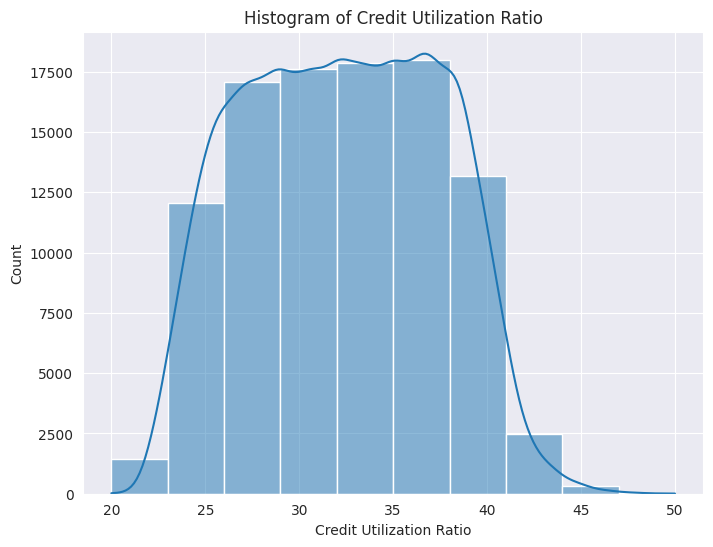

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Credit_Utilization_Ratio', bins=10, kde=True)
plt.title('Histogram of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Count')
plt.show()

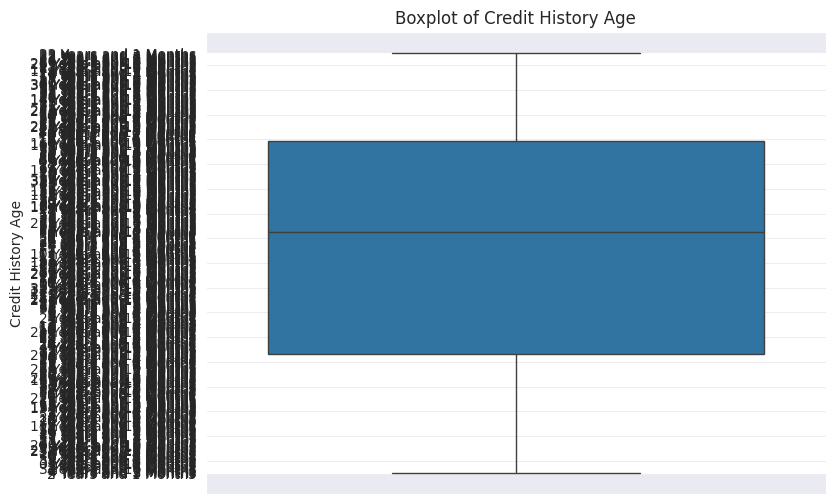

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Credit_History_Age')
plt.title('Boxplot of Credit History Age')
plt.ylabel('Credit History Age')
plt.show()

Credit Utilization Ratio and Credit_History_Age seem well distributed with very less outliers.

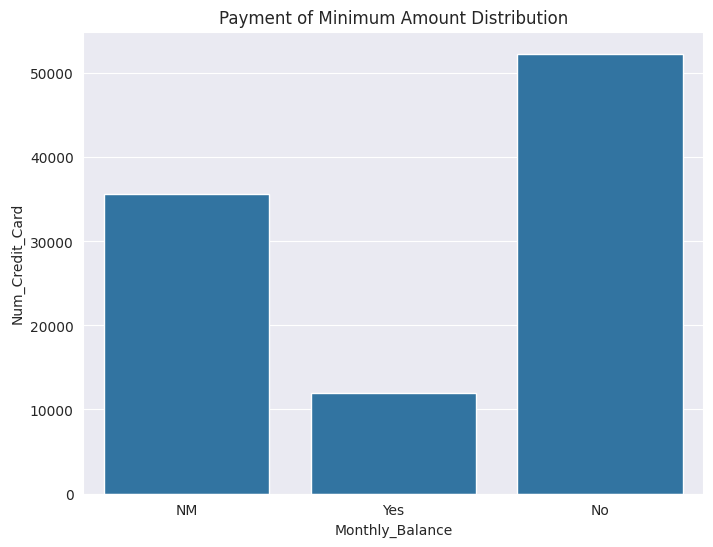

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Payment_of_Min_Amount')
plt.title('Payment of Minimum Amount Distribution')
plt.xlabel('Monthly_Balance')
plt.ylabel('Num_Credit_Card')
plt.xticks([0, 1, 2], ['NM', 'Yes', 'No'])  # Assuming 0 = NM, 1 = Yes, 2 = No
plt.show()


**PLOTTING**


<Axes: xlabel='Annual_Income'>

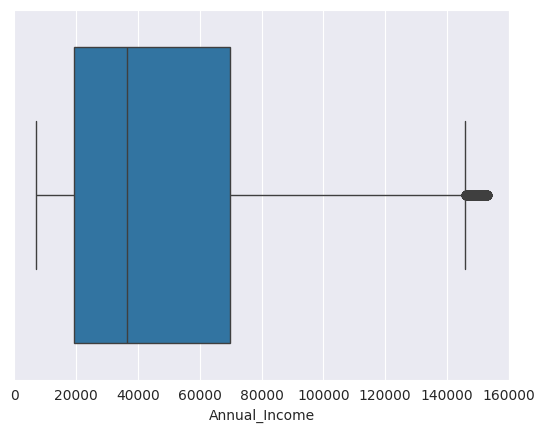

In [ ]:
sns.boxplot(x=df_cleaned['Annual_Income'])

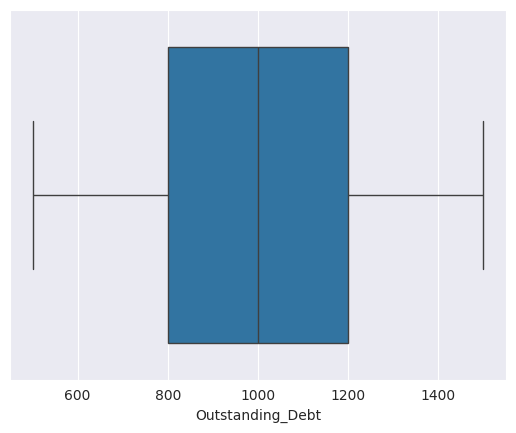

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example to define df_cleaned (adjust according to your data source)
df_cleaned = pd.DataFrame({'Outstanding_Debt': [1000, 1500, 800, 1200, 500]})

# Now you can plot
sns.boxplot(x=df_cleaned['Outstanding_Debt'])

# Show plot when using environments that don't automatically display plots (like some IDEs or scripts)
plt.show()


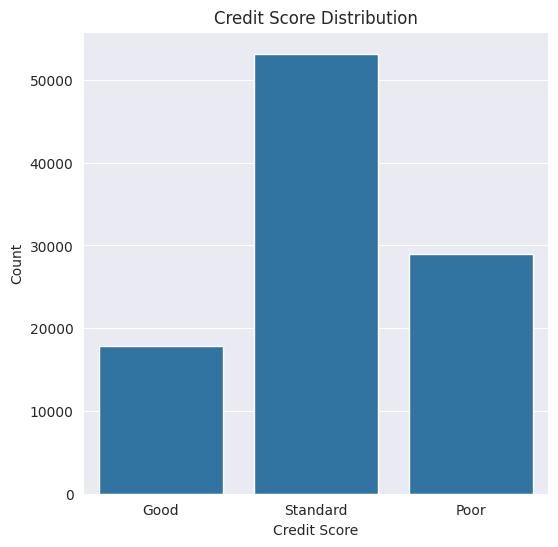

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Credit_Score')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

Credit Score is our target variable and we see it is not very well balanced. The maximum values are for Standard. Since we are going to perform Classification, we would perform Oversampling and fix this before training the model.

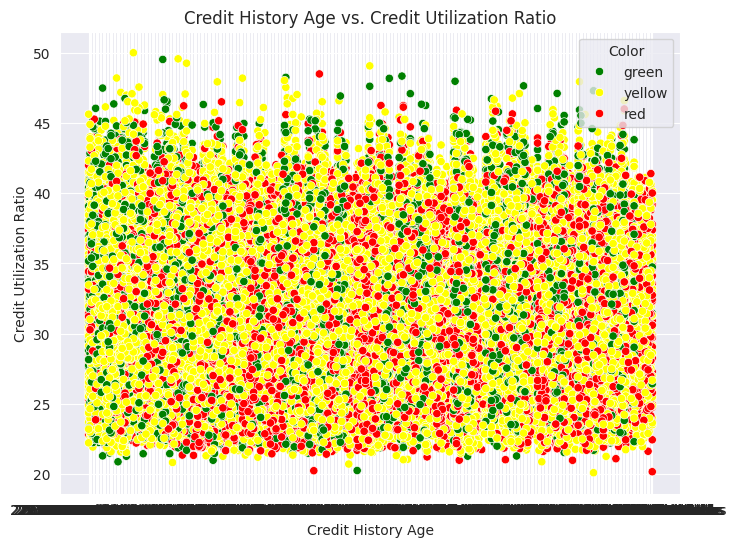

In [ ]:
# Map Credit_Score to colors
color_map = {'Good': 'green', 'Standard': 'yellow', 'Poor': 'red'}
df['Color'] = df['Credit_Score'].map(color_map)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Credit_History_Age', y='Credit_Utilization_Ratio', hue='Color', palette=color_map.values())
plt.title('Credit History Age vs. Credit Utilization Ratio')
plt.xlabel('Credit History Age')
plt.ylabel('Credit Utilization Ratio')
plt.show()


Looking at Credit History Age vs. Credit Utilization Ratio, we see how Poor and Good scores are clearly distributed, this concludes, someone having a good Credit History and Utilization is very much dependent on the values.

We even see some Green values towards left side as well.

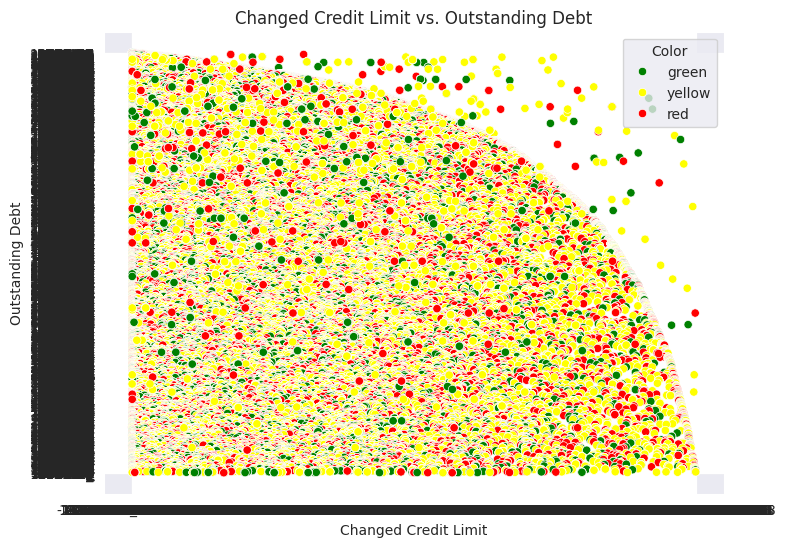

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Changed_Credit_Limit', y='Outstanding_Debt', hue='Color', palette=color_map.values())
plt.title('Changed Credit Limit vs. Outstanding Debt')
plt.xlabel('Changed Credit Limit')
plt.ylabel('Outstanding Debt')
plt.show()

We see a similar behaviour in this graph as well, the Green and Red values are classified very distinctly. And even for the Yellow regions, there are certain parts. This also states that both this could be excellent features for the building the model. We will see this during feature selection.

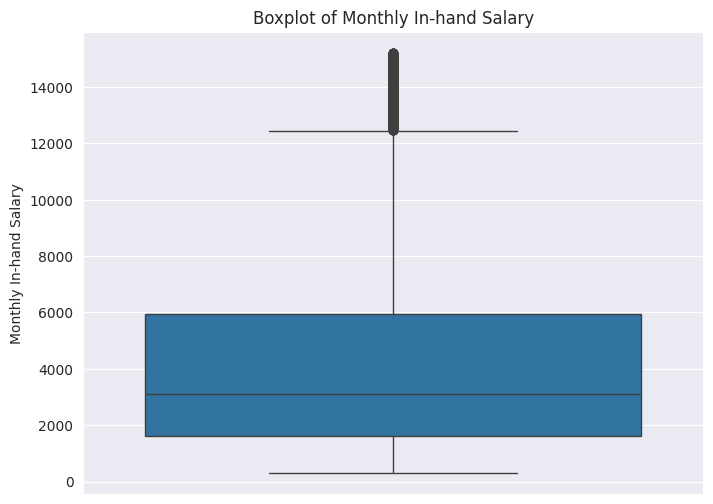

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Monthly_Inhand_Salary')
plt.title('Boxplot of Monthly In-hand Salary')
plt.ylabel('Monthly In-hand Salary')
plt.show()


We then plot Annual Income vs. Monthly In-hand Salary, to see if the trend is linear and dependednt or, if there is some other trend.

In [ ]:
print(df['Annual_Income'].dtype)
print(df['Monthly_Inhand_Salary'].dtype)


object
float64


In [ ]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')


In [ ]:
df.dropna(subset=['Annual_Income', 'Monthly_Inhand_Salary'], inplace=True)

# Optional: Check for and remove infinite values if they could exist
import numpy as np
df = df[np.isfinite(df['Annual_Income']) & np.isfinite(df['Monthly_Inhand_Salary'])]


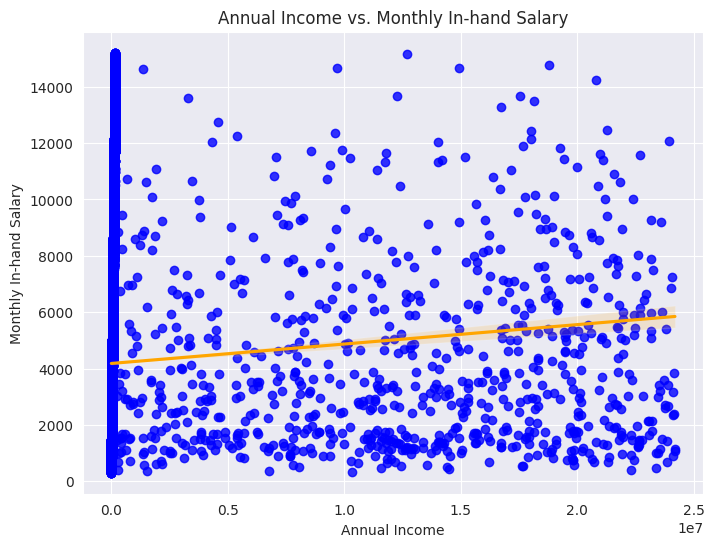

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Annual_Income', y='Monthly_Inhand_Salary', scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})
plt.title('Annual Income vs. Monthly In-hand Salary')
plt.xlabel('Annual Income')
plt.ylabel('Monthly In-hand Salary')
plt.show()

We tried doing the same thing again, for Amount Invested Monthly vs. Monthly Balance. But the results are random, having all the values spread everywhere. Again, indicating, both the features might not be the best for training the model.

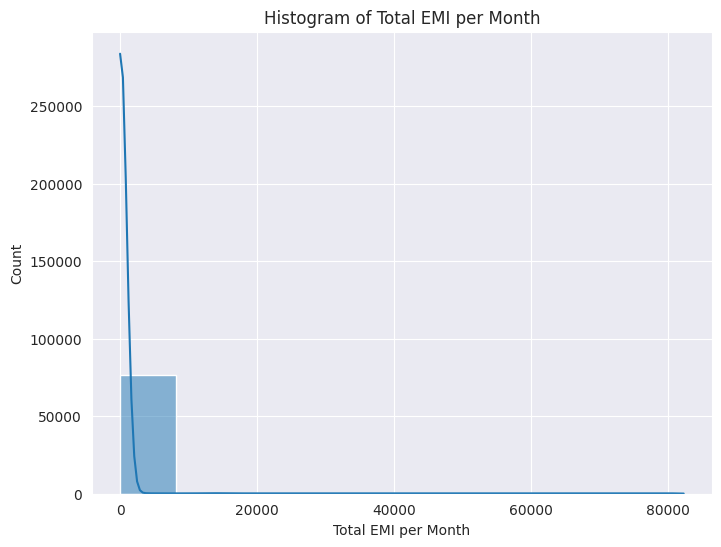

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Total_EMI_per_month', bins=10, kde=True)
plt.title('Histogram of Total EMI per Month')
plt.xlabel('Total EMI per Month')
plt.ylabel('Count')
plt.show()

<ipython-input-69-909201c87a41>:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


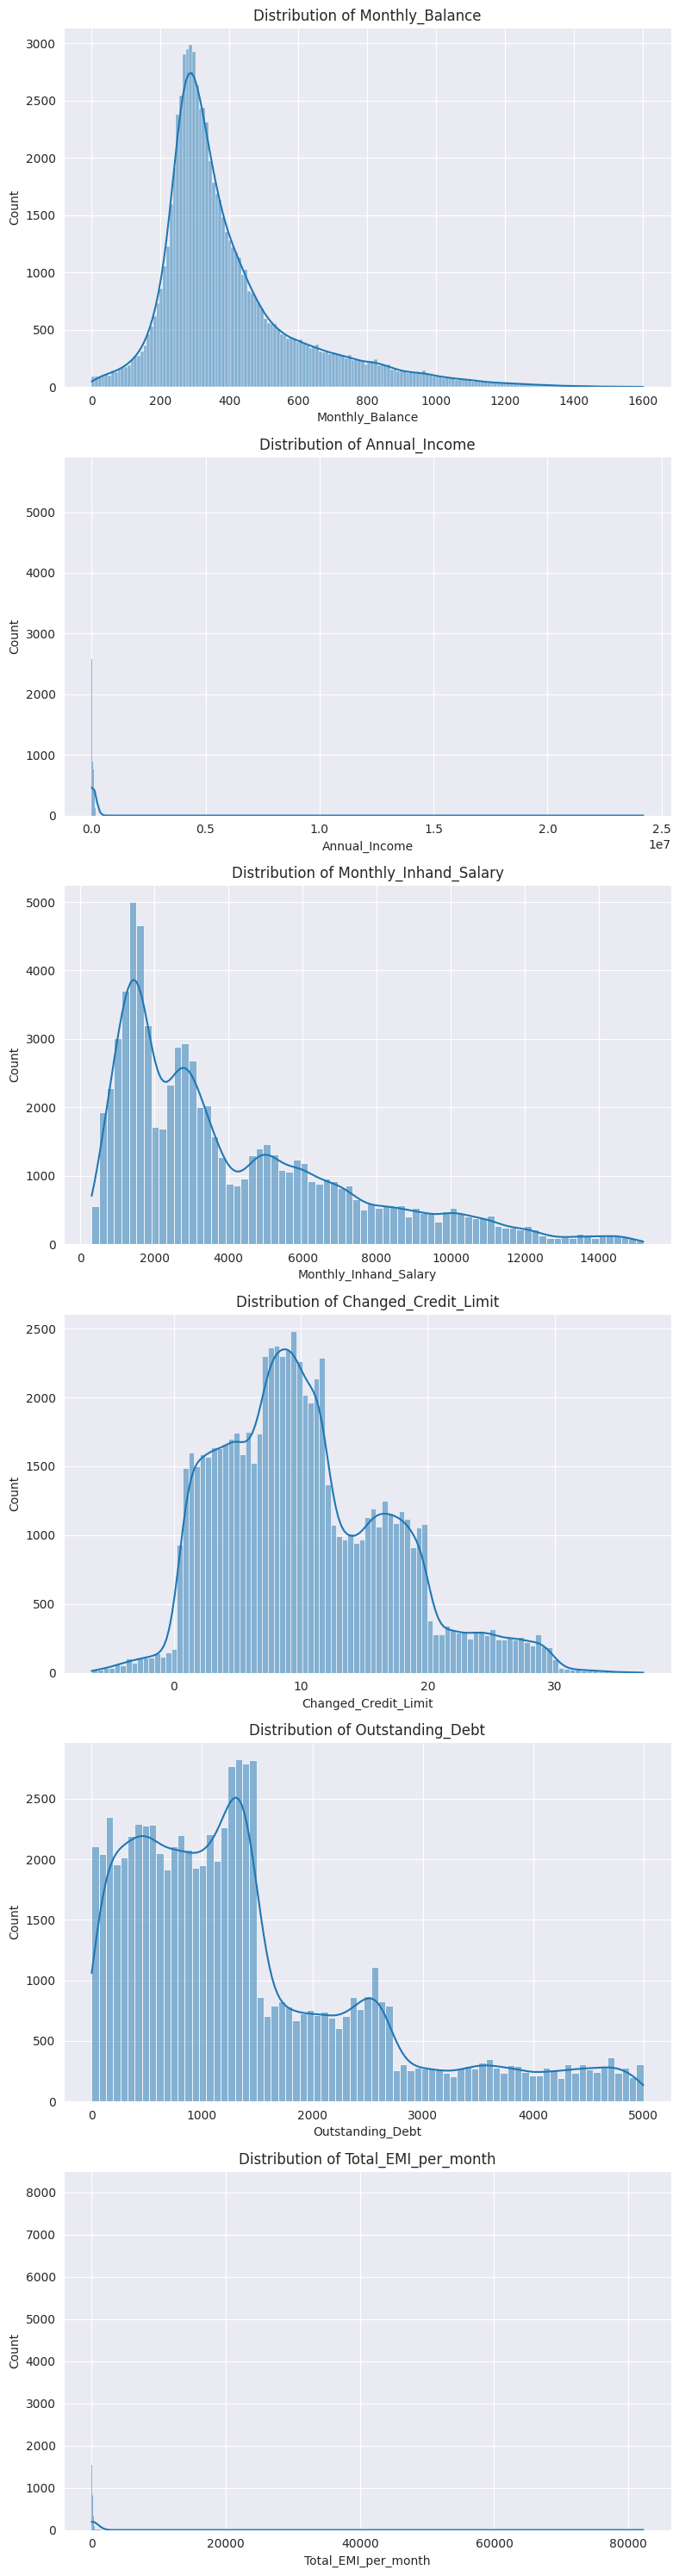

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with the actual filename or path)
df = pd.read_csv('train.csv')

# Specify the columns you want to plot
cols_to_plot = ['Monthly_Balance', 'Annual_Income', 'Monthly_Inhand_Salary',
                'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month']

# Ensure all specified columns are numeric and handle any missing values
for col in cols_to_plot:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where any of the specified columns contain NaN after coercion
df.dropna(subset=cols_to_plot, inplace=True)

# Create subplots with a vertical layout based on the number of columns to plot
num_plots = len(cols_to_plot)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 5 * num_plots))

# In case of a single column to plot, axes will not be an array but a single AxesSubplot object.
# Normalize axes to always be an array for consistency in the loop below.
if num_plots == 1:
    axes = [axes]

# Loop through the columns, creating a histogram for each
for i, col in enumerate(cols_to_plot):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


Finally, we plot some distributions of certain features. Because of these features, we know which of them should be transformed. And we would do so in the coming section.

**Checking data**

In [ ]:
print(df_cleaned.columns)


Index(['Outstanding_Debt'], dtype='object')


In [ ]:
### Balancing - Occupation
import pandas as pd

# Assuming df_cleaned is your DataFrame
# Check if 'Occupation' column exists and if it contains missing values
if 'Occupation' in df_cleaned.columns:
    # If 'Occupation' column exists, get the value counts
    occupation_count = df_cleaned['Occupation'].value_counts(dropna=False)
    print(occupation_count)
else:
    print("'Occupation' column not found in the DataFrame.")


'Occupation' column not found in the DataFrame.


In [ ]:
import matplotlib.pyplot as plt

# Explore data balance
if 'Credit_Score' in df_cleaned.columns:
    label = df_cleaned['Credit_Score'].value_counts().index
    label_count = df_cleaned['Credit_Score'].value_counts().values
    plt.pie(x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
    plt.show()
else:
    print("The DataFrame does not contain a column named 'Credit_Score'.")


The DataFrame does not contain a column named 'Credit_Score'.


,Outstanding_Debt
Outstanding_Debt,1.0


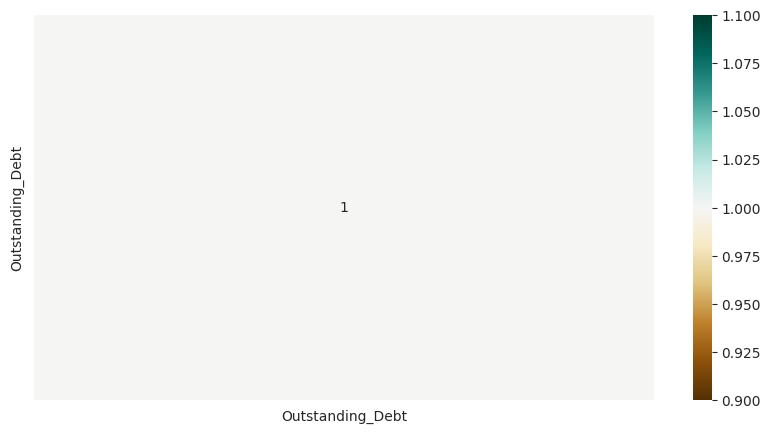

In [ ]:
plt.figure(figsize=(10,5))
c= df_cleaned.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

array([[<Axes: title={'center': 'Outstanding_Debt'}>]], dtype=object)

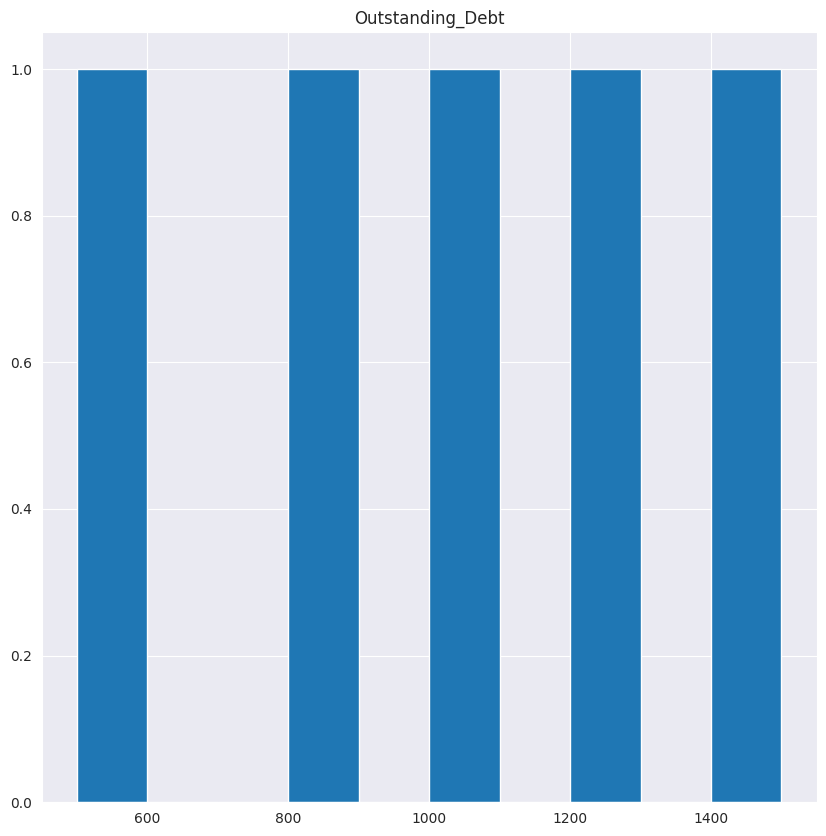

In [ ]:
df_cleaned.hist(figsize=(10, 10))

In [ ]:
#Clean data features description
X=data.drop("Credit_Score",axis=1)
y=data["Credit_Score"]

numeric=X.select_dtypes(exclude="object").columns
categorical=['Payment_of_Min_Amount', 'Credit_Mix']

low_cardinality=[col for col in numeric if data[col].nunique()<=30]
high_cardinality=[col for col in numeric if data[col].nunique()>30]

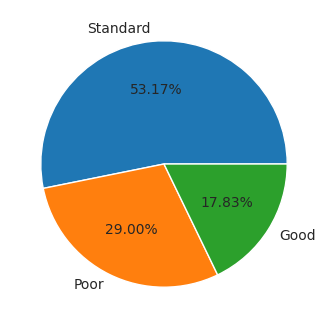

In [ ]:


import matplotlib.pyplot as plt

# Calculate the value counts of 'Credit_Score'
ser = data["Credit_Score"].value_counts()

# Set the figure size
plt.figure(figsize=(4, 4))

# Create the pie chart
plt.pie(x=ser.values, labels=ser.index, autopct="%0.2f%%", radius=1)

# Save the figure with reduced size
plt.savefig("image1.png", bbox_inches='tight', dpi=150)

There is unequal class distribution in target variable,but the difference ratio is not very high. we will test cost-sensitive learning on the dataset.

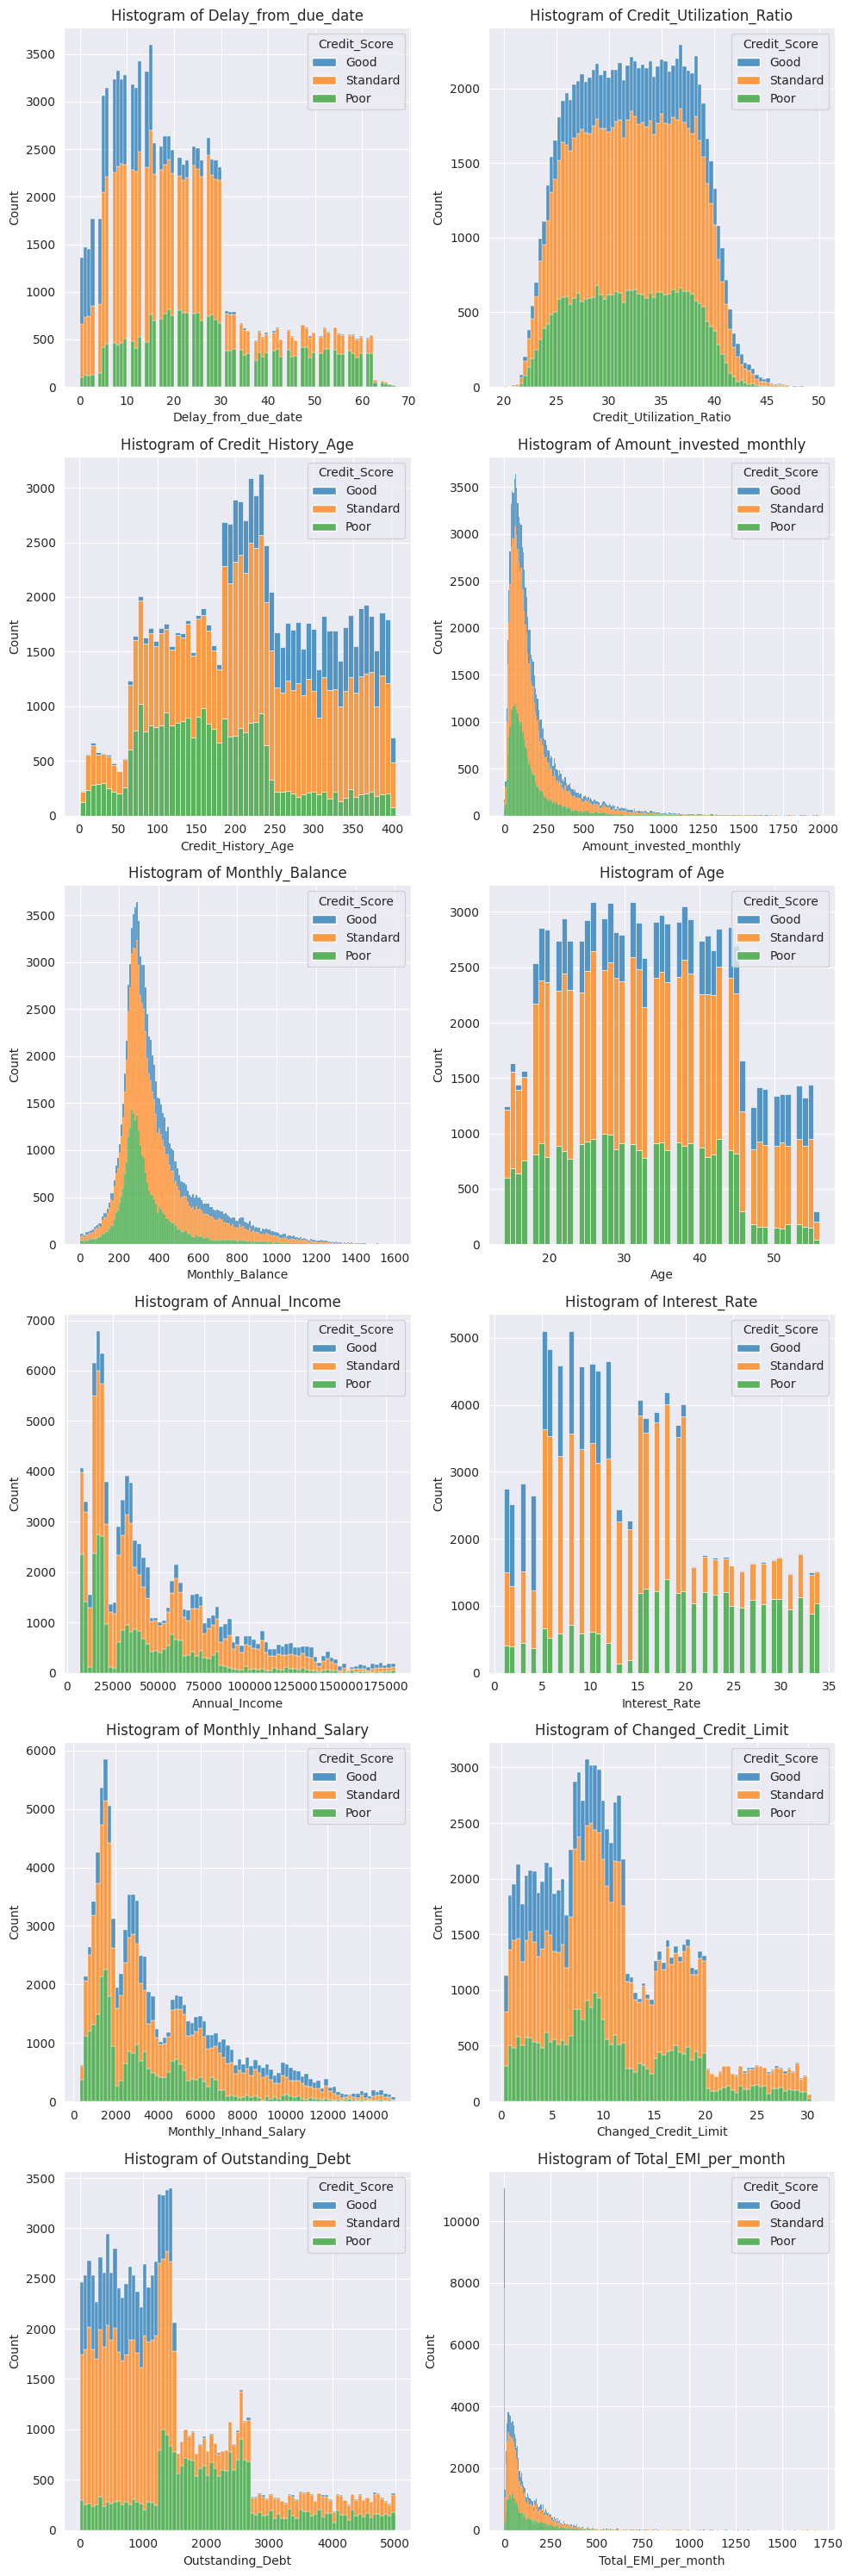

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows for subplots
rows = len(high_cardinality) // 2 if len(high_cardinality) % 2 == 0 else len(high_cardinality) // 2 + 1

# Check if the number of rows is positive
if rows > 0:
    # Create subplots
    fig, axes = plt.subplots(rows, 2, figsize=(10, 30))

    # Flatten the axes for easier iteration
    ax = axes.flatten()

    # Iterate over the high_cardinality columns and plot histograms
    for i, col in enumerate(high_cardinality):
        sns.histplot(data=data, x=col, hue="Credit_Score", ax=ax[i], multiple="stack")
        ax[i].set_title(f'Histogram of {col}')

    plt.tight_layout()
    plt.savefig("image2.png")
    plt.show()
else:
    print("No data to plot.")


Outstanding_Dedt,Interest_Rate,Delay_from_due_date as these variables value increases, the proportion of Bad Credit_Score instances increases substantially, while Standard and Good Credit_Score instances proportion become meagre.
On the other hand increase in Credit_History_Age, Age reults in decrease of Bad Credit_Score instances, jump in Standard and Good Credit_Score instance.
Interestingly credit_utilization_ratio seems to seems to have same distribution for all categories of credit score.
The distribution of many features have non-gaussian distribution and largely different scales, therefore we will tranform feature variables.

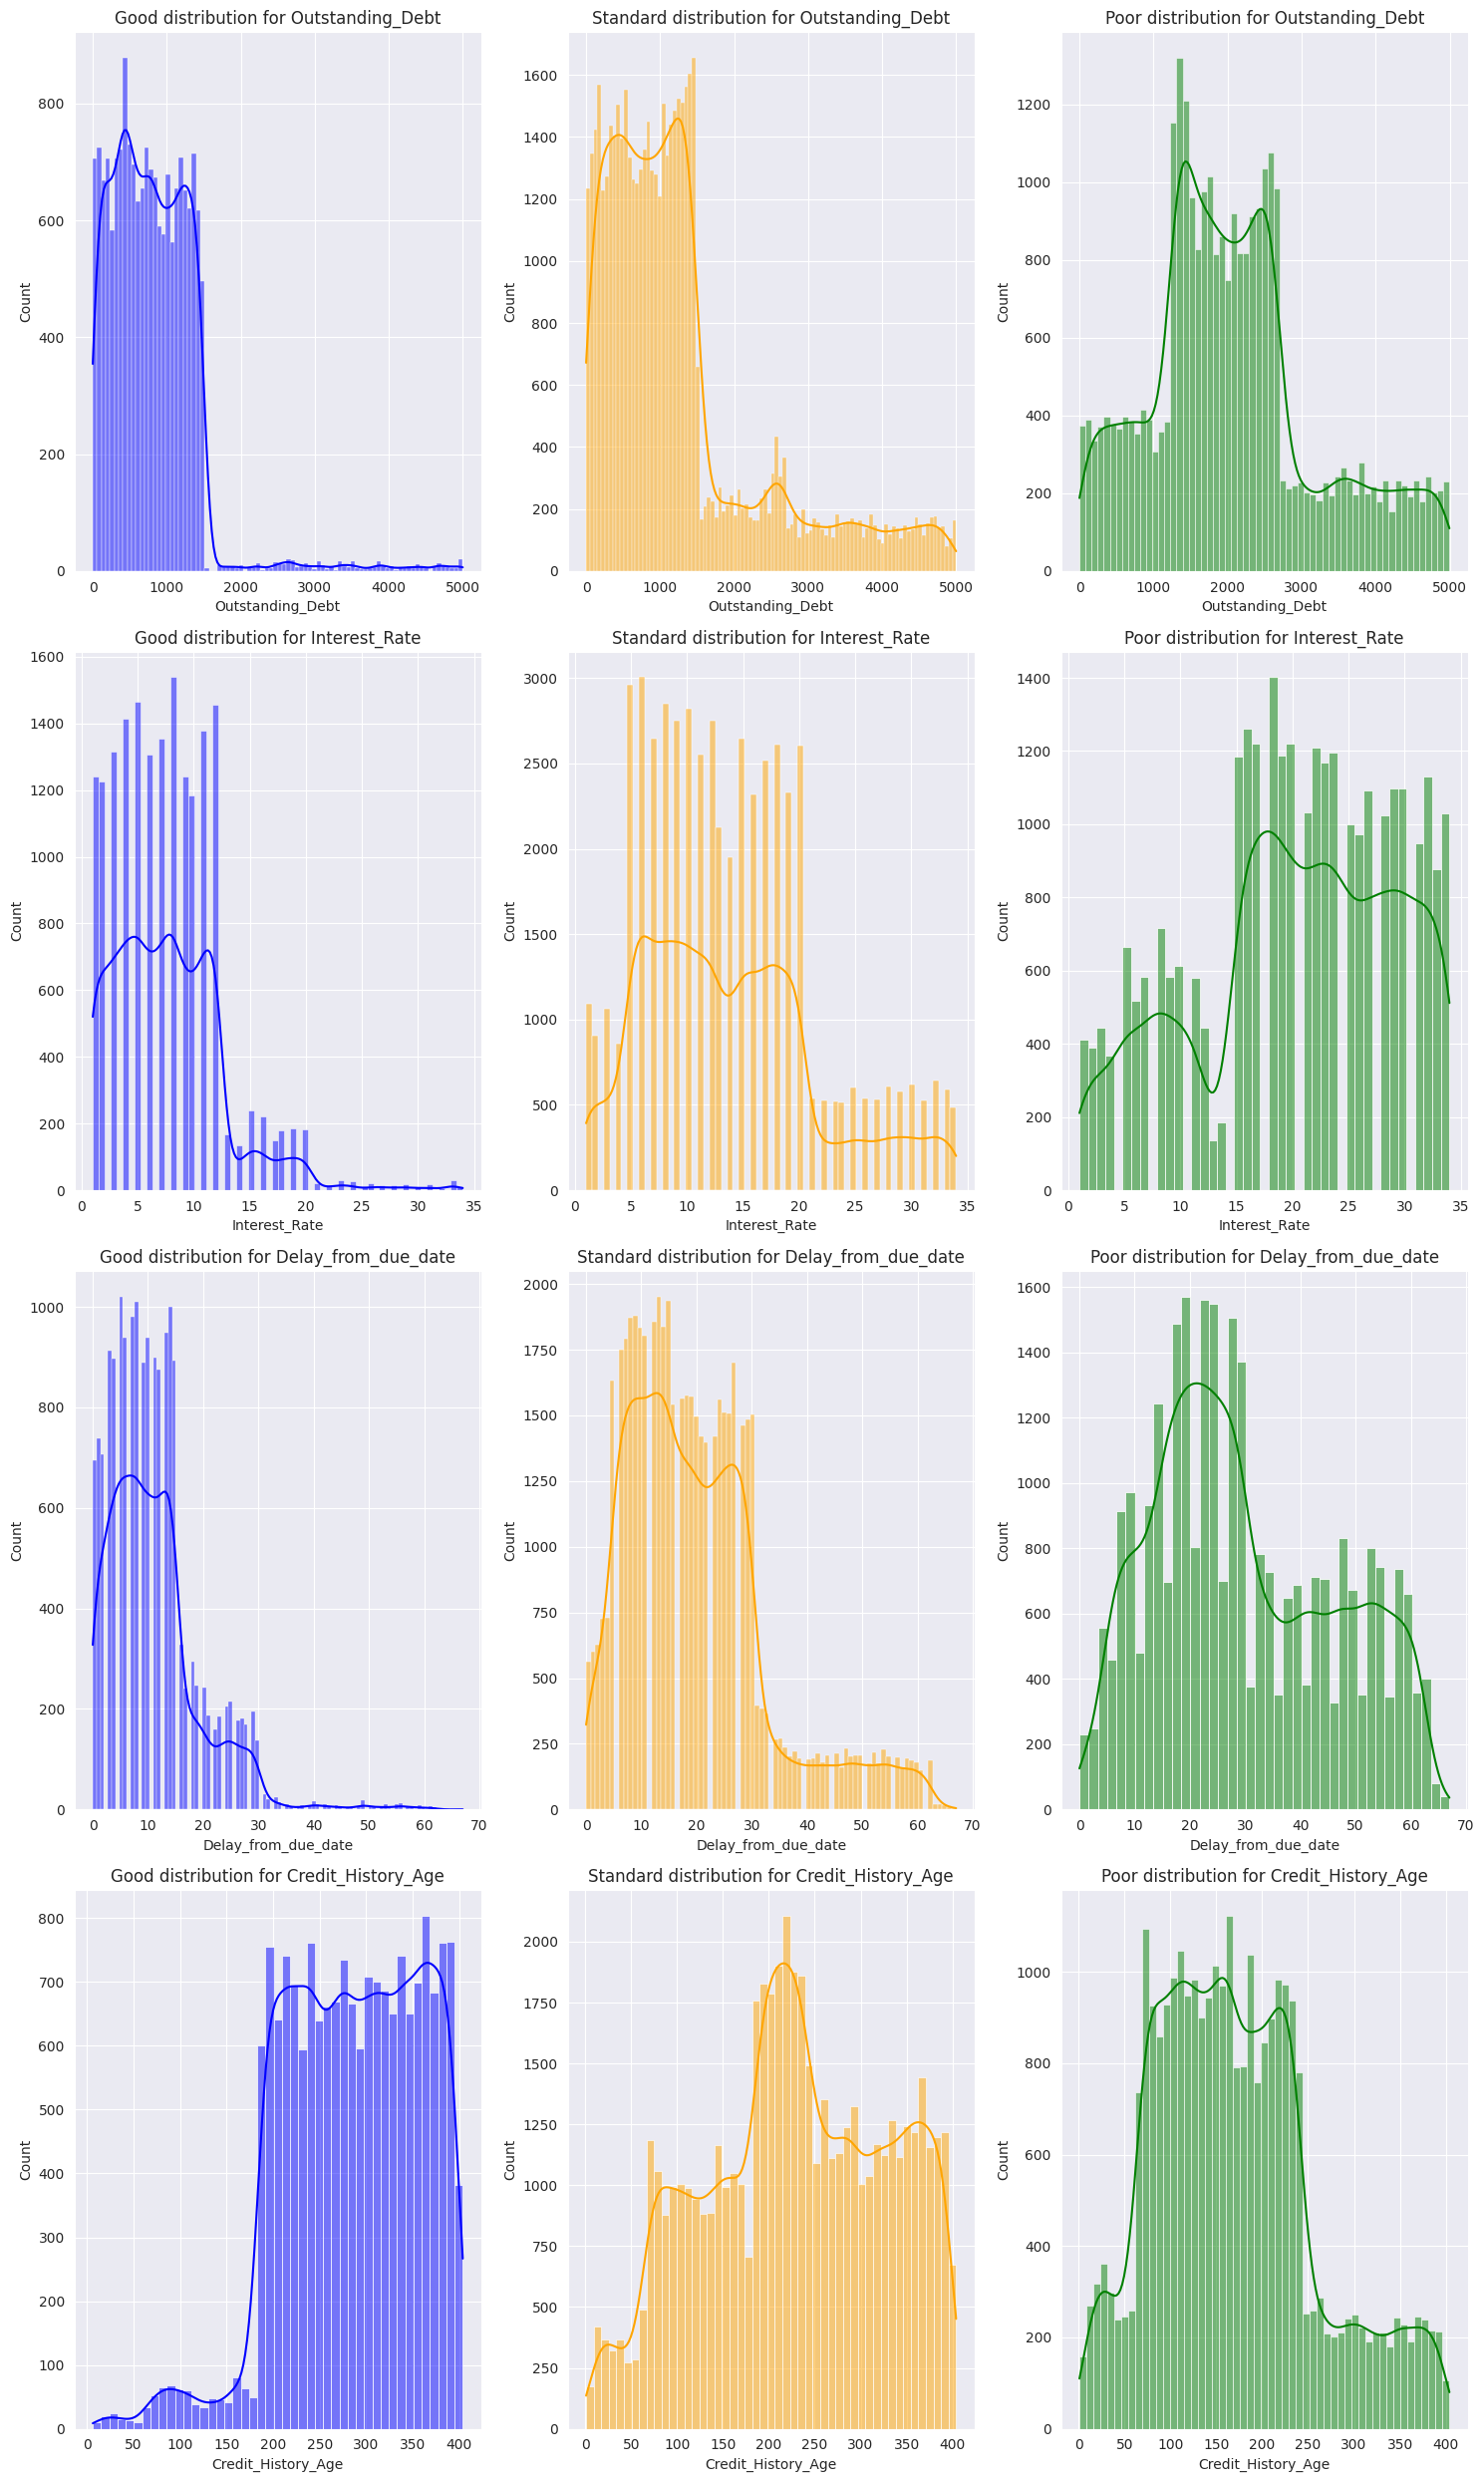

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns, credit score values, and colors
cols = ["Outstanding_Debt", "Interest_Rate", "Delay_from_due_date", "Credit_History_Age"]
vals = ["Good", "Standard", "Poor"]
colors = ["blue", "orange", "green"]

# Create subplots
fig, axes = plt.subplots(len(cols), len(vals), figsize=(15, 25))

# Iterate over columns and values to plot histograms
for i, col in enumerate(cols):
    for j, val in enumerate(vals):
        ax = axes[i, j]  # Get the subplot for the current column and value
        inter = data[data["Credit_Score"] == val]  # Filter data by credit score value
        sns.histplot(data=inter, x=col, ax=ax, color=colors[j], kde=True)
        ax.set_title(f"{val} distribution for {col}")  # Set title for the subplot

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("image3.png")
plt.show()


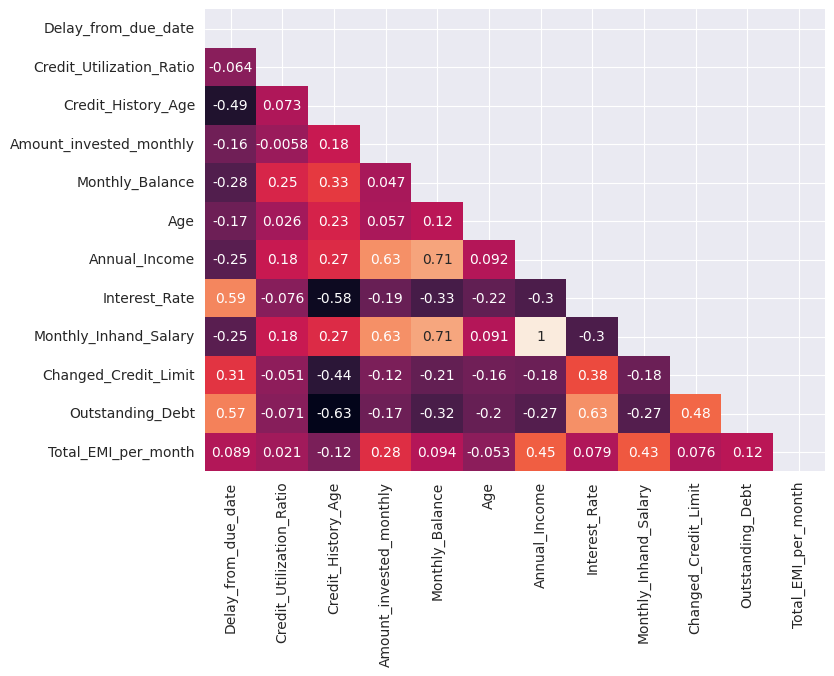

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check if high_cardinality columns exist in data
if all(col in data.columns for col in high_cardinality):
    # Calculate correlation matrix
    corr_matrix = data[high_cardinality].corr()

    # Create a mask to hide the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, cbar=False, annot=True, fmt=".2g", mask=mask)

    # Save the plot
    plt.savefig("image4.png")
    plt.show()
else:
    print("Columns not found in the DataFrame.")


In [ ]:
df_cleaned.hist(figsize=(10, 10))

**Normalization**

In [ ]:
df_cleaned.head()

In [ ]:
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in df_cleaned[col_float]:
  df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned.head()

Encoding

In [ ]:
df_cleaned.columns

In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, prefix='Occupation', columns=['Occupation'], drop_first=False)
df_cleaned.head()

In [ ]:
#Select all columns
feed = df_cleaned[['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']]

In [ ]:
df_train_x = feed.drop('Credit_Score',axis = 1)
df_train_y = feed['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

Modeling

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
kn_y_pred = kn.predict(x_test)
kn_cm = confusion_matrix(y_test,kn_y_pred)
kn_accuracy = accuracy_score(y_test,kn_y_pred)
print("confusion matrics=",kn_cm)
print("  ")
print("accuracy=",kn_accuracy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)
rf_cm = confusion_matrix(y_test,rf_y_pred)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("confusion matrics=",rf_cm)
print("  ")
print("accuracy=",rf_accuracy)

**Run the model to Test data**

In [ ]:
test

In [ ]:
test = test.dropna().copy()

In [ ]:
#Drop the incorrect data
drop_test = drop_test[drop_test['Occupation'].str.contains('_______') == False]
drop_test = drop_test[drop_test['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [ ]:
# Revise the incorrect data whole table
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount']
for i in col_int:
  for c in sym:
    drop_test[i] = drop_test[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    drop_test[i] = drop_test[i].replace(c,'')
drop_test.head()

In [ ]:
#Transform the information to the value
drop_test['Credit_History_Age'] = drop_test['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_test['Credit_History_Age'] = drop_test['Credit_History_Age'].astype(str).str.replace('Months','')

In [ ]:
#Transform the information to the value as level
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_test.head()

In [ ]:
#Transform the object data the be float data type
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_test[i] = drop_test[i].astype(float)
drop_test.dtypes

In [ ]:
# Transform the target data to numerical
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('No', '2')
drop_test['Payment_of_Min_Amount'] = drop_test[['Payment_of_Min_Amount']].apply(pd.to_numeric)

In [ ]:
drop_test = pd.get_dummies(drop_test, prefix='Occupation', columns=['Occupation'], drop_first=False)
drop_test.head()

In [ ]:
df_cleaned.columns

In [ ]:
df_cleaned.info()

In [ ]:
drop_test.info()

In [ ]:
drop_test.columns

In [ ]:
drop_test

In [ ]:
Credit_Score = rf.predict(drop_test)

In [ ]:
drop_test['Credit_Score'] = Credit_Score
drop_test

**Pipelining**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
df = pd.read_csv("/kaggle/input/processed-data-credit-score/Score.csv")
df = df[["Credit_Utilization_Ratio", 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance',\
        'Annual_Income', 'Monthly_Inhand_Salary','Changed_Credit_Limit', 'Outstanding_Debt', \
        'Total_EMI_per_month', 'Credit_Score']]

class TargetLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = LabelEncoder()

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X, y=None):
        return self.encoder.transform(X)
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    initial_rows = data.shape[0]
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    removed_rows = initial_rows - data.shape[0]
    print(f"Removed {removed_rows} rows from '{col}' column.")
    return data
target_label_encoder = TargetLabelEncoder()

In [ ]:
df.head()

In [ ]:
# Columns to apply log transform to
log_transform_cols = ['Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']

# Apply log transform
df['Amount_invested_monthly'] = np.log(df['Amount_invested_monthly'])
df['Monthly_Balance'] = np.log(df['Monthly_Balance'])
df['Annual_Income'] = np.log(df['Annual_Income'])
df['Monthly_Inhand_Salary'] = np.log(df['Monthly_Inhand_Salary'])
df['Outstanding_Debt'] = np.log(df['Outstanding_Debt'])

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [ ]:
columns_to_remove_outliers = ['Credit_History_Age', 'Monthly_Balance', 'Outstanding_Debt', 'Total_EMI_per_month']
for col in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, col)

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

cols = list(df.columns)[:-1]
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [ ]:
y = target_label_encoder.fit_transform(df["Credit_Score"])
X = df.drop("Credit_Score", axis=1)

In [ ]:
y = target_label_encoder.fit_transform(df["Credit_Score"])
X = df.drop("Credit_Score", axis=1)

In [ ]:
features = list(df.columns)[:-1]
print("features:", features, sep="\n")

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

X_new = selector.transform(X)
#print(data.columns[selector.get_support(indices=True)].tolist())
final_features = df.columns[selector.get_support(indices=True)].tolist()
print(final_features)

In [ ]:
y = df["Credit_Score"]
X = df[final_features]

In [ ]:
# Define pipeline
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

pipeline = ImbPipeline(steps=[
    ('classifier', GridSearchCV(KNeighborsClassifier(), param_grid={
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }, cv=5, scoring='accuracy'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Best KNN Model Accuracy: {accuracy:.2f}")
print("Best Hyperparameters:", pipeline.named_steps['classifier'].best_params_)

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

**Saving and reloading model**

In [ ]:
import pickle

with open('knn_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
with open('knn_model.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

In [ ]:
y_pred_loaded = loaded_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_loaded)

print(f"Best KNN Model Accuracy: {accuracy:.2f}")
print("Best Hyperparameters:", loaded_pipeline.named_steps['classifier'].best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_loaded))